## [SVHN](https://pytorch.org/vision/stable/generated/torchvision.datasets.SVHN.html#torchvision.datasets.SVHN)

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/mnt


In [59]:
import os
import random
import numpy as np
import torch
import torchvision

In [60]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [66]:
train_dataset = torchvision.datasets.SVHN(root = './data', str = 'train', download=True)
test_dataset = torchvision.datasets.SVHN(root = './data', str = 'test', download=True)

TypeError: ignored

In [50]:
print(type(train_dataset))
print(type(test_dataset))

# tuple: (image, target)

NameError: ignored

In [ ]:
print(len(dataset))

60000


In [ ]:
n = 200
data, target = dataset[n]

In [ ]:
print(type(data))

<class 'PIL.Image.Image'>


In [ ]:
print(data.mode, data.width, data.height)

L 28 28


In [ ]:
print(type(target))

<class 'int'>


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [ ]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.FashionMNIST('./data', transform = ToTensor)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

In [ ]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(color)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

In [ ]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    img = img[0] 
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [37]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [38]:
print(is_cuda, device)

True cuda


In [39]:
import torchvision.transforms as transforms
compose = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = 0.5, std = 0.5)
])

train_data = torchvision.datasets.SVHN(root='./data/', split='train', transform=compose, download=True)
test_data  = torchvision.datasets.SVHN(root='./data/', split='test', transform=compose, download=True)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [40]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 73257
test sets: 26032


In [41]:
train_batch_size = 64
test_batch_size = 64

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=train_batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=test_batch_size,
                                          shuffle=False)

In [42]:
class SVHNModel(nn.Module):
    def __init__(self, output_size):
        super(SVHNModel, self).__init__() # (n, 1, 28, 28)
        self.cv = nn.Sequential(
                nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1), # 1 = input channel size(gray), 3 = output(filter) volume size (n, 8, 26, 26)
                                              # padding = 0, stride = (1, 1)
                nn.ReLU(),
                nn.MaxPool2d(2),
                nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), # (n, 10, 10, 10)
                nn.ReLU(),
                nn.MaxPool2d(2) # (n, 10, 5, 5)
        )

        self.fc = nn.Sequential(nn.Linear(128 * 8 * 8, 1024),
                                nn.ReLU(),
                                nn.Dropout(0.5),
                                nn.Linear(1024, 10)
              )        
        
    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 128 * 8 * 8)
        output = self.fc(x)
        with torch.no_grad():
            value = torch.max(output, 1)[1]
        return output, value

In [43]:
model = SVHNModel(10).to(device)

In [44]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([64, 3, 32, 32])
tensor([[ 2.0743e-02,  2.4685e-02,  4.1975e-02, -1.9330e-02, -2.5881e-02,
          4.5858e-02,  1.0955e-02, -9.5657e-03,  4.8158e-02, -2.7071e-02],
        [ 3.6521e-02,  5.9143e-02,  1.9834e-02, -9.0047e-03, -2.2207e-02,
          2.4602e-02, -1.6687e-02, -2.1494e-02,  3.8664e-02, -1.6609e-02],
        [ 7.7044e-02,  9.3397e-02,  7.2263e-02, -4.1857e-02, -1.2253e-02,
          3.6340e-02, -6.7697e-03, -1.7153e-04,  9.1841e-02, -3.7070e-02],
        [ 4.8159e-02,  1.1036e-02,  3.0670e-02,  8.8966e-03, -7.6140e-02,
          3.2174e-02, -2.1961e-02, -1.6206e-02,  1.1413e-02, -2.4627e-02],
        [ 3.0580e-02,  2.9044e-02,  5.1858e-02,  2.1209e-02, -5.1651e-02,
          2.8996e-02, -1.3533e-02, -1.6411e-02,  1.0372e-02, -6.0646e-02],
        [ 3.6878e-02,  6.2376e-02,  5.8676e-02, -3.0594e-03, -3.9333e-02,
          2.7331e-02, -4.2751e-04, -4.1476e-02,  2.8709e-02, -4.4145e-02],
        [ 2.8306e-02,  1.1290e-02,  5.8445e-02, -4.3608e-02, -1.1104e-02,
    

In [45]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [46]:
model = SVHNModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 10 # 10회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        del train_target
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1

    model.eval()
    n_test = 0
    test_loss = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred, _ = model(test_data)
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1

    print('epoch {}th training loss: {} test loss: {}'.format(epoch, train_loss / n_train, test_loss / n_test))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th training loss: 2.265155792236328 test loss: 2.226400119286996
epoch 1th training loss: 2.1852879862527588 test loss: 1.8507794671588473
epoch 2th training loss: 1.2540182680697054 test loss: 0.9221777584817674
epoch 3th training loss: 0.7628262421569308 test loss: 0.7114238187118813
epoch 4th training loss: 0.6079303292003838 test loss: 0.6084122569472702
epoch 5th training loss: 0.527746758348233 test loss: 0.542639520433214
epoch 6th training loss: 0.4798909707649334 test loss: 0.5251545950218484
epoch 7th training loss: 0.4358782377597448 test loss: 0.488271235315888
epoch 8th training loss: 0.39989769096310074 test loss: 0.4751172087810658
epoch 9th training loss: 0.37073426270807114 test loss: 0.4696068752695013


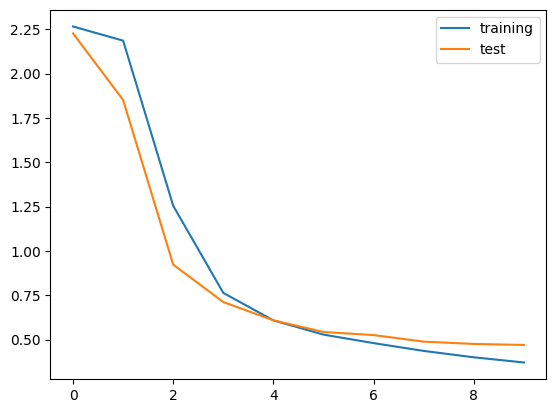

In [47]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.853
